# https://www.kaggle.com/c/2019-2nd-ml-month-with-kakr/

# 1. import modules

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # matplotlib와 같이쓰면 prettier 가능

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras import backend as K

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline
sns.set() # convert visualize style to seaborn style

Using TensorFlow backend.


# 2. load train data and explore

In [6]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [7]:
pd.set_option('display.max_columns', None)
train_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
id               15035 non-null int64
date             15035 non-null object
price            15035 non-null float64
bedrooms         15035 non-null int64
bathrooms        15035 non-null float64
sqft_living      15035 non-null int64
sqft_lot         15035 non-null int64
floors           15035 non-null float64
waterfront       15035 non-null int64
view             15035 non-null int64
condition        15035 non-null int64
grade            15035 non-null int64
sqft_above       15035 non-null int64
sqft_basement    15035 non-null int64
yr_built         15035 non-null int64
yr_renovated     15035 non-null int64
zipcode          15035 non-null int64
lat              15035 non-null float64
long             15035 non-null float64
sqft_living15    15035 non-null int64
sqft_lot15       15035 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.4+ MB


In [9]:
# numerical statistics of columns in data
train_df.describe() 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,15035.000000,1.503500e+04,15035.000000,15035.000000,15035.000000,1.503500e+04,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000
mean,7517.000000,5.406827e+05,3.369139,2.115065,2083.790223,1.529697e+04,1.498071,0.007117,0.234253,3.406651,7.660725,1794.158164,289.632059,1971.100432,83.798936,98078.031726,47.560721,-122.213677,1992.754772,12823.884935
std,4340.374984,3.715247e+05,0.902721,0.767519,922.134087,4.261282e+04,0.538522,0.084063,0.763376,0.646505,1.179803,831.738609,440.663284,29.407612,400.398498,53.297815,0.138164,0.141294,691.456442,27736.259787
min,0.000000,7.800000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3758.500000,3.220000e+05,3.000000,1.750000,1430.000000,5.027500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.472700,-122.328000,1490.000000,5100.000000
50%,7517.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.231000,1850.000000,7610.000000
75%,11275.500000,6.450000e+05,4.000000,2.500000,2560.000000,1.069550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2230.000000,550.000000,1997.000000,0.000000,98117.000000,47.678300,-122.126000,2360.000000,10076.000000
max,15034.000000,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 20 columns):
id               6468 non-null int64
date             6468 non-null object
bedrooms         6468 non-null int64
bathrooms        6468 non-null float64
sqft_living      6468 non-null int64
sqft_lot         6468 non-null int64
floors           6468 non-null float64
waterfront       6468 non-null int64
view             6468 non-null int64
condition        6468 non-null int64
grade            6468 non-null int64
sqft_above       6468 non-null int64
sqft_basement    6468 non-null int64
yr_built         6468 non-null int64
yr_renovated     6468 non-null int64
zipcode          6468 non-null int64
lat              6468 non-null float64
long             6468 non-null float64
sqft_living15    6468 non-null int64
sqft_lot15       6468 non-null int64
dtypes: float64(4), int64(15), object(1)
memory usage: 1010.7+ KB


In [11]:
# shape of data
print(train_df.shape)
print(test_df.shape)

(15035, 21)
(6468, 20)


/Users/bmy4415/.pyenv/versions/3.5.4/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


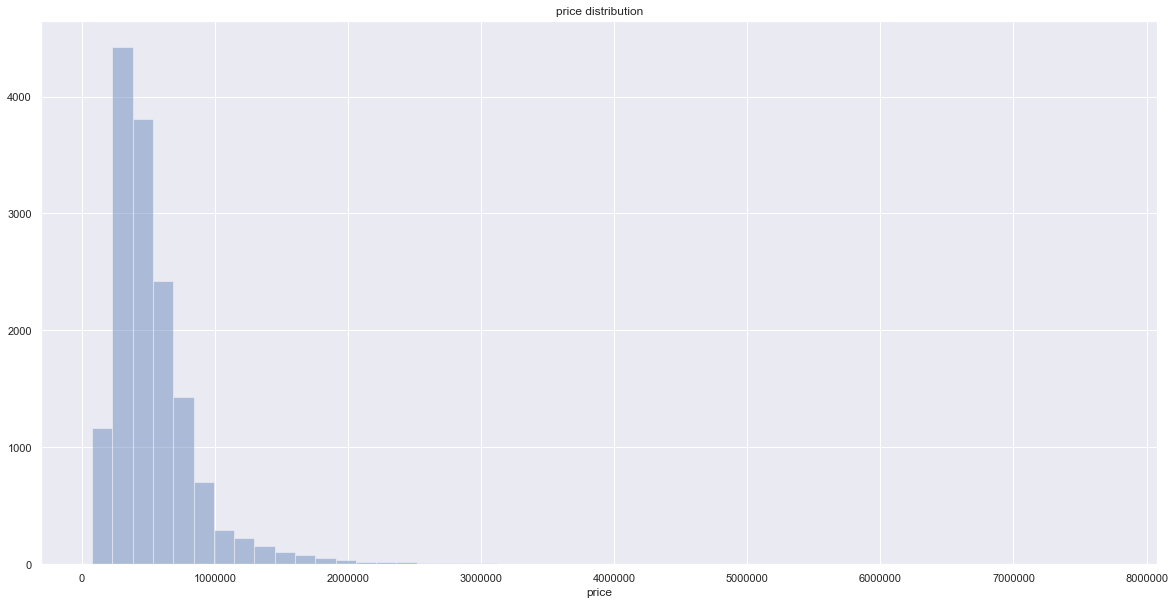

mean of price: 540682.6531426671
std of price: 371524.6603903916
skew: 4.290252396939529
kurt: 40.15491919350329


In [12]:
# output distribution
f, ax = plt.subplots(figsize=(20,10))
ax.set_title('price distribution')
ax.set_xlabel('price')
sns.distplot(train_df.price, ax=ax, kde=False)
# data.price.plot.hist(ax=ax, bins=30, edgecolor='black', color='red')

plt.show()
print('mean of price:', train_df.price.mean())
print('std of price:', train_df.price.std())
print('skew:', train_df['price'].skew()) # 오른쪽으로 긴 꼬리
print('kurt:', train_df['price'].kurt()) # 2~3 이내를 정규분포에 가깝게 평탄하다고 해석 => 정규분포와 매우 멂

In [13]:
# price가 skewed 이므로 normaliztion 시도
print('log1p skew:', np.log1p(train_df['price']).skew())
print('log1p kurt:', np.log1p(train_df['price']).kurt())

log1p skew: 0.4330991387067915
log1p kurt: 0.7316049825519855


In [14]:
# price normalization
# train_df['price'] = np.log1p(train_df['price'])

In [15]:
# categorical인지 numerical인지 확인
train_df.nunique()

id               15035
date               365
price             3263
bedrooms            11
bathrooms           29
sqft_living        863
sqft_lot          7678
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         789
sqft_basement      271
yr_built           116
yr_renovated        65
zipcode             70
lat               4692
long               716
sqft_living15      682
sqft_lot15        6958
dtype: int64

In [16]:
# column에 대해서 전처리 할 경우 test도 동일하게 해줘야함
total = pd.concat([train_df.drop(['price'], axis=1), test_df])
cols = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']

for col in cols:
    print(col, ':', 'before:', total[col].skew(), total[col].kurt(), '=>',
          np.log1p(total[col]).skew(), np.log1p(total[col]).kurt())

sqft_living : before: 1.4714137250528125 5.251052318414965 => -0.035745101681499934 -0.05320442033328909
sqft_lot : before: 13.063414417656206 284.94672694598296 => 0.9637552183392046 3.3209552513757
sqft_above : before: 1.4460080680592546 3.4022187863259004 => 0.2528162250698482 -0.31707548878923264
sqft_basement : before: 1.5763445992828624 2.7085396515219506 => 0.48385256166784557 -1.71271169651884
lat : before: -0.48682988646238273 -0.6753388924515127 => -0.4914938138681153 -0.6692782880251178
long : before: 0.8840484561667199 1.050448897343919 => nan nan
sqft_living15 : before: 1.1065938309038392 1.5950775283272915 => 0.20525058575113472 -0.20843236049313596
sqft_lot15 : before: 9.509189855329153 150.76934428017316 => 0.9684535166245153 3.559305824324047


/Users/bmy4415/.pyenv/versions/3.5.4/lib/python3.5/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log1p
  


In [17]:
# lat과 long을 제외하고 normalization 적용
cols.remove('lat')
cols.remove('long')

for col in cols:
    total[col] = np.log1p(total[col])

In [18]:
# date는 월, 년이 바뀌는 경우 급격하게 바뀌므로 yyyy, mm, dd로 분리
total['yyyy'] = total['date'].str[:4].astype(int)
total['mm'] = total['date'].str[4:6].astype(int)
total['dd'] = total['date'].str[6:8].astype(int)
total = total.drop(['date'], axis=1)

In [19]:
# x_train, y_train, x_test 생성
x_train = total.drop(['id'], axis=1)[:train_df.shape[0]]
y_train = train_df.price
x_test = total.drop(['id'], axis=1)[train_df.shape[0]:]

# trainset, validset split
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [20]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(12028, 21)
(12028,)
(6468, 21)


In [21]:
# f, ax = plt.subplots(2, 2, figsize=(20,10))

# sns.countplot(x='waterfront', data=train_df, ax=ax[0, 0])
# sns.countplot(x='view', data=train_df, ax=ax[0, 1])
# sns.countplot(x='grade', data=train_df, ax=ax[1, 0])
# sns.countplot(x='condition', data=train_df, ax=ax[1, 1])

# plt.show()

## model
- DNN
- linear regression
- randomforest regressor
- gradient boosting
- light gbm
- xgboost

In [36]:
class DNN():
    def __init__(self, input_dim):    
        model = Sequential()
        model.add(Dense(32, input_dim=input_dim, activation='tanh'))
        model.add(Dropout(0.15))
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(0.15))
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(0.15))
        model.add(Dense(1, activation="linear")) # regression
        
        optimizer = Adam(lr=0.01)
        model.compile(optimizer=optimizer,
                      loss='mean_squared_error',
                      metrics=['mean_squared_error'])
        
        self.model = model
        
    def fit(self, x, y):
        early_stopping = EarlyStopping(monitor='val_mean_squared_error', patience=10)
        return self.model.fit(x, y, epochs=1000, batch_size=256,
                             validation_split=0.15,
                             callbacks=[early_stopping],
                             verbose=0)

    def predict(self, x):
        return np.squeeze(self.model.predict(x)) # return 1d array

In [23]:
# plot loss, accuracy
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    
    # Plot training & validation accuracy values
    ax1.plot(history.history['mean_squared_error'])
    ax1.plot(history.history['val_mean_squared_error'])
    ax1.set_title('Model mse')
    ax1.set_ylabel('MSE')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Valid'], loc='upper left')
    
    # Plot training & validation loss values
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Model loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Valid'], loc='upper left')

valid mse: 357967.6543137756


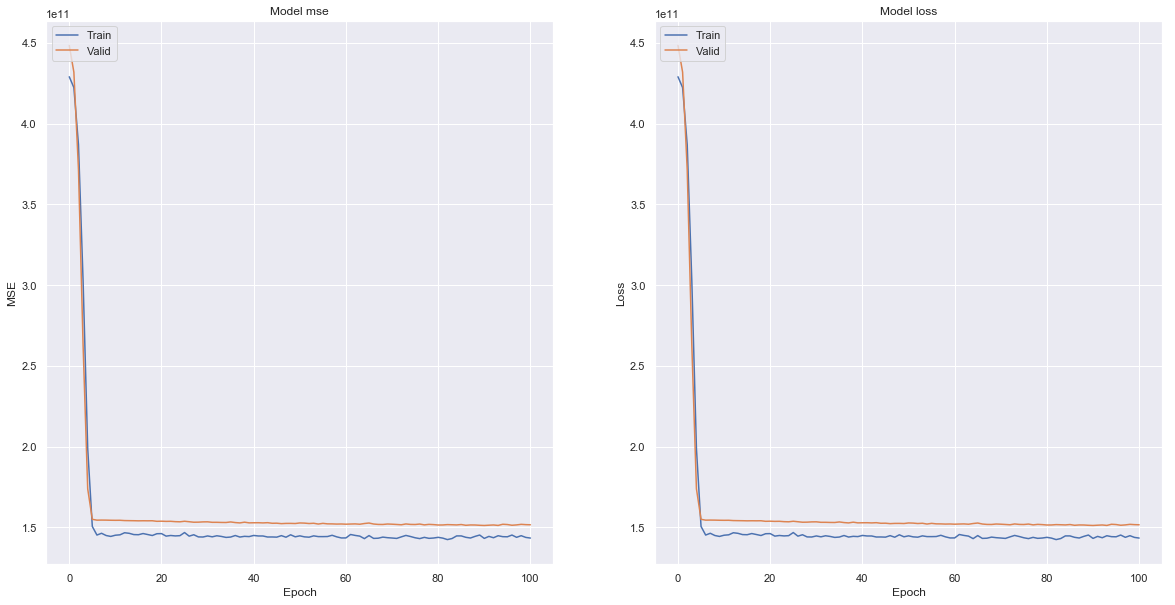

In [37]:
# dense layer model
def train(x_train, x_valid, y_train, y_valid, x_test):
    reg = DNN(21) # number of columns in x_train
    history = reg.fit(x_train, y_train)
    valid = reg.predict(x_valid)
    test = reg.predict(x_test)
    plot_history(history)
    return valid, test
    
dnn_val, dnn_test = train(x_train, x_valid, y_train, y_valid, x_test)
# print('valid mse:', np.sqrt(np.mean(np.square(np.expm1(y_valid)-np.expm1(dnn_val)))))
print('valid mse:', np.sqrt(np.mean(np.square(y_valid-dnn_val))))

In [25]:
# linear regression
from sklearn.linear_model import LinearRegression

def train(x_train, x_valid, y_train, y_valid, x_test):
    model = LinearRegression()
    model = model.fit(x_train, y_train)
    valid = model.predict(x_valid)
    test = model.predict(x_test)
    return valid, test
    
lin_val, lin_test = train(x_train, x_valid, y_train, y_valid, x_test)
# print('valid rmse:', np.sqrt(np.mean(np.square(np.expm1(y_valid)-np.expm1(lin_val)))))
print('valid mse:', np.sqrt(np.mean(np.square(y_valid-lin_val))))

valid mse: 203691.61551204388


/Users/bmy4415/.pyenv/versions/3.5.4/lib/python3.5/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [26]:
# randomforest regressor
from sklearn.ensemble import RandomForestRegressor

def train(x_train, x_valid, y_train, y_valid, x_test):
    model = RandomForestRegressor(n_estimators=1000)
    model = model.fit(x_train, y_train)
    valid = model.predict(x_valid)
    test = model.predict(x_test)
    return valid, test
    
rdf_val, rdf_test = train(x_train, x_valid, y_train, y_valid, x_test)
# print('valid rmse:', np.sqrt(np.mean(np.square(np.expm1(y_valid)-np.expm1(rdf_val)))))
print('valid mse:', np.sqrt(np.mean(np.square(y_valid-rdf_val))))

valid mse: 142833.78875339305


In [27]:
# gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor

def train(x_train, x_valid, y_train, y_valid, x_test):
    model = GradientBoostingRegressor(n_estimators=1500)
    model = model.fit(x_train, y_train)
    valid = model.predict(x_valid)
    test = model.predict(x_test)
    return valid, test
    
gbr_val, gbr_test = train(x_train, x_valid, y_train, y_valid, x_test)
# print('valid rmse:', np.sqrt(np.mean(np.square(np.expm1(y_valid)-np.expm1(gbr_val)))))
print('valid mse:', np.sqrt(np.mean(np.square(y_valid-gbr_val))))

valid mse: 126882.0246147264


In [28]:
# lightgbm
from lightgbm import LGBMRegressor

def train(x_train, x_valid, y_train, y_valid, x_test):
    model = LGBMRegressor(n_estimators=1500)
    model = model.fit(x_train, y_train)
    valid = model.predict(x_valid)
    test = model.predict(x_test)
    return valid, test

lgb_val, lgb_test = train(x_train, x_valid, y_train, y_valid, x_test)
# print('valid rmse:', np.sqrt(np.mean(np.square(np.expm1(y_valid)-np.expm1(lgb_val)))))
print('valid mse:', np.sqrt(np.mean(np.square(y_valid-lgb_val))))

/Users/bmy4415/.pyenv/versions/3.5.4/lib/python3.5/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


valid mse: 130862.45347930482


In [29]:
# xgboost
from xgboost import XGBRegressor

def train(x_train, x_valid, y_train, y_valid, x_test):
    model = XGBRegressor(n_estimators=1500)
    model = model.fit(x_train, y_train)
    valid = model.predict(x_valid)
    test = model.predict(x_test)
    return valid, test

xgb_val, xgb_test = train(x_train, x_valid, y_train, y_valid, x_test)
# print('valid rmse:', np.sqrt(np.mean(np.square(np.expm1(y_valid)-np.expm1(xgb_val)))))
print('valid mse:', np.sqrt(np.mean(np.square(y_valid-xgb_val))))

/Users/bmy4415/.pyenv/versions/3.5.4/lib/python3.5/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


valid mse: 126153.68802177103


In [39]:
# enbemble
score = lin_val + rdf_val + gbr_val + lgb_val + xgb_val
lin_ratio = lin_val/score
rdf_ratio = rdf_val/score
gbr_ratio = gbr_val/score
lgb_ratio = lgb_val/score
xgb_ratio = xgb_val/score

pred = lin_val*lin_ratio + rdf_val*rdf_ratio + gbr_val*gbr_ratio + lgb_val*lgb_ratio + xgb_val*xgb_ratio

# pred = np.sum([
#     reg_val*0.1,
#     lin_val*0.07,
#     rid_val*0.07,
#     ela_val*0.00,
#     bay_val*0.06,
#     gbr_val*0.7
# ], axis=0)

print('pred.shape', pred.shape)
# print('valid rmse:', np.sqrt(np.mean(np.square(np.expm1(y_valid)-np.expm1(pred)))))
print('valid mse:', np.sqrt(np.mean(np.square(y_valid-pred))))

pred.shape (3007,)
valid mse: 129560.01289418797


In [ ]:
# submission

pred = np.sum([
    reg_test*0.1,
    lin_test*0.07,
    rid_test*0.07,
    ela_test*0.00,
    bay_test*0.06,
    gbr_test*0.7
], axis=0)
pred = pd.DataFrame(pred)
pred['id'] = test_df['id']
pred.columns = ['price', 'id']
pred.head()

In [ ]:
pred[['id', 'price']].to_csv('./submission.csv', index=False)